# !!! This NB deviates from the similar NB of the GYD experiment since wanted to include rhoL-rho in the assocs table even though it has no significant assocs.

In [70]:
import pandas as pd
pd.options.display.max_columns = 100

In [71]:
muts_df = pd.read_pickle("./data/SER_df.pkl")
muts_df.shape

(27, 45)

In [72]:
from util.feature import get_feat_d

In [73]:
cond_cnt_d = {"none": 0}
feat_cnt = 0
for _, r in muts_df.iterrows():
    for regdb_id, links in r["operon links"].items():
        feat_d = get_feat_d(RegulonDB_ID=regdb_id, json=r["operons"])
        
        # Getting counts according to links
        feat_cnt += len(links)
        for i in range(0, len(links)):
            if len(feat_d["significantly associated conditions"]) > 0:
                for c in feat_d["significantly associated conditions"]:
                    if c not in cond_cnt_d.keys():
                        cond_cnt_d[c] = 0
                    cond_cnt_d[c] += 1
            else:
                cond_cnt_d["none"] += 1
        
cond_cnt_d

{'none': 8,
 'ΔsdaA ΔsdaB ΔtdcG ΔglyA': 21,
 "glycine(2mM)  L-Serine(varying concentration)  trace elements(X1)  Wolfe's vitamin solution.": 21}

,condition,mutated feature count,proportion
0,none,8.0,0.275862
1,ΔsdaA ΔsdaB ΔtdcG ΔglyA,21.0,0.724138
2,glycine(2mM) L-Serine(varying concentration) ...,21.0,0.724138


Text(0.5, 0, 'mutated feature count')

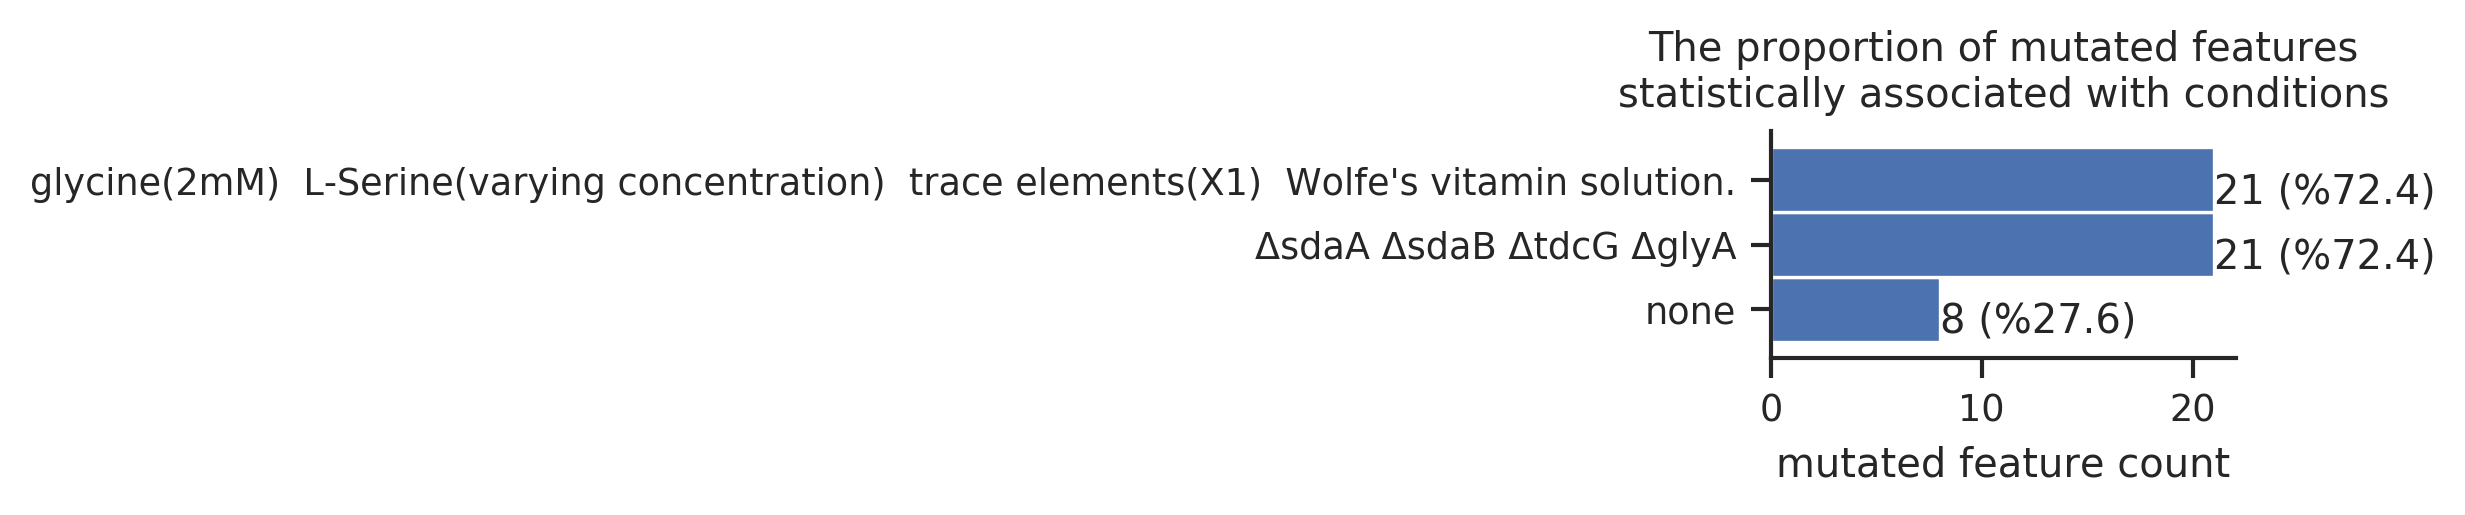

In [74]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.dpi"] = 300
sns.set_context("paper")
sns.set_style("ticks")

cond_cnt_df = pd.DataFrame()
for key, val in cond_cnt_d.items():
    cond_cnt_df = cond_cnt_df.append({"condition": key, "mutated feature count": val, "proportion":val/feat_cnt}, ignore_index=True)
display(cond_cnt_df)

cond_cnt_df = cond_cnt_df.sort_values(by="mutated feature count", ascending=True)

ax = cond_cnt_df.plot.barh(
    y="mutated feature count",
    x="condition",
    color="#4C72B0",
    figsize=(2,1),
    width=1
)

cond_cnt_df = cond_cnt_df.reset_index()  # Resetting index for the below annotations to work
for i, r in cond_cnt_df.iterrows(): 
    s = str(int(r["mutated feature count"])) +' (%{0:.1f})'.format(r["proportion"] * 100)
    ax.text(r["mutated feature count"], i-0.35,  s)
sns.despine(ax=ax, top=True, right=True)
ax.set_title("The proportion of mutated features\nstatistically associated with conditions")
ax.get_legend().remove()
sns.despine(ax=ax, top=True, right=True)
ax.set_ylabel('')
ax.set_xlabel("mutated feature count")

In [75]:
import pickle
f = open("./data/signif_operon_cond_json.pkl", 'rb')   
signif_genomic_feat_cond_json = pickle.load(f)
signif_genomic_feat_cond_json[0:5]

[{'mutated features': 'aas-lplT',
  'condition': 'glucose(4) or xylose(4)',
  'odd ratio': 17.205197132616487,
  'p value': 0.007325006804571186},
 {'mutated features': 'abgR',
  'condition': 'D-2-deoxyribose',
  'odd ratio': 11.982785602503913,
  'p value': 0.0026539393528984753},
 {'mutated features': 'ackA-pta',
  'condition': 'Δpgi',
  'odd ratio': 14.514177693761814,
  'p value': 0.00024189746691603674},
 {'mutated features': 'acs-yjcH-actP',
  'condition': 'D-lyxose',
  'odd ratio': 102.13756613756614,
  'p value': 0.00023728943036487225},
 {'mutated features': 'agrA',
  'condition': '42 celsius',
  'odd ratio': 19.857881136950905,
  'p value': 0.0006411677537597424}]

In [76]:
def get_signif_mut_conds(feat_name):
    signif_mut_conds = []
    for signif_mut_cond in signif_genomic_feat_cond_json:
        if signif_mut_cond['mutated features'] == feat_name:
            signif_mut_conds.append(signif_mut_cond)
    return signif_mut_conds
    
    

cond_mut_feat_assoc_df = pd.DataFrame()
for _, mut in muts_df.iterrows():
    for feat in mut["operons"]:
        signif_mut_conds = get_signif_mut_conds(feat["name"])
        for d in signif_mut_conds:
            cond_mut_feat_assoc_df = cond_mut_feat_assoc_df.append(d, ignore_index=True)

cond_mut_feat_assoc_df.head()

,condition,mutated features,odd ratio,p value
0,glycine(2mM) L-Serine(varying concentration) ...,thrLABC,78.105263,0.000013
1,ΔsdaA ΔsdaB ΔtdcG ΔglyA,thrLABC,78.105263,0.000013
2,isobutyric acid,pykF,5.297887,0.000038
3,glycine(2mM) L-Serine(varying concentration) ...,aroP,153.301587,0.007475
4,ΔsdaA ΔsdaB ΔtdcG ΔglyA,aroP,153.301587,0.007475


In [77]:
SER_cond_mut_feat_assoc_df = cond_mut_feat_assoc_df[cond_mut_feat_assoc_df["condition"].isin(cond_cnt_d.keys())].copy()

cross_counts_df = pd.crosstab(
    SER_cond_mut_feat_assoc_df["mutated features"],
    SER_cond_mut_feat_assoc_df["condition"]
)

cross_counts_df

condition,glycine(2mM) L-Serine(varying concentration) trace elements(X1) Wolfe's vitamin solution.,ΔsdaA ΔsdaB ΔtdcG ΔglyA
mutated features,,
argP,1,1
aroKB-damX-dam-rpe-gph-trpS,1,1
aroP,1,1
cycA,1,1
gcvA,2,2
gcvB,2,2
gcvR,2,2
gshA,1,1
lrp,2,2


In [78]:
bin_df = cross_counts_df.copy()
for ir, r in bin_df.iterrows():
    for ic, c in r.items():
        if bin_df.loc[ir, ic] > 0:
            bin_df.loc[ir, ic] = 1
display(bin_df)

condition,glycine(2mM) L-Serine(varying concentration) trace elements(X1) Wolfe's vitamin solution.,ΔsdaA ΔsdaB ΔtdcG ΔglyA
mutated features,,
argP,1,1
aroKB-damX-dam-rpe-gph-trpS,1,1
aroP,1,1
cycA,1,1
gcvA,1,1
gcvB,1,1
gcvR,1,1
gshA,1,1
lrp,1,1


In [79]:
# only want to plot genomic targets that have significant convergences
# I only want to look at mutated targets that have significant convergence
signif_targ_s = set()
for _, r in muts_df.iterrows():
    for f in r["operons"]:
        if f["significantly enriched"]:
            signif_targ_s.add(f["name"])
signif_targ_s

{'gcvA', 'gcvB', 'gcvR', 'lrp', 'rhoL-rho', 'thrLABC'}

In [80]:
odds_df = bin_df.copy()
for ir, r in bin_df.iterrows():
    for ic, c in r.items():
        if bin_df.loc[ir, ic] > 0:
            odd_ratio = 0
            df = cond_mut_feat_assoc_df[
                (cond_mut_feat_assoc_df["condition"]==ic)
                & (cond_mut_feat_assoc_df["mutated features"]==ir)]["odd ratio"]
            if len(df):
                odd_ratio = df.iloc[0]
            odds_df.loc[ir, ic] = odd_ratio
            
odds_df = odds_df[odds_df.index.isin(signif_targ_s)]
odds_df

condition,glycine(2mM) L-Serine(varying concentration) trace elements(X1) Wolfe's vitamin solution.,ΔsdaA ΔsdaB ΔtdcG ΔglyA
mutated features,,
gcvA,158.942387,158.942387
gcvB,158.942387,158.942387
gcvR,102.150794,102.150794
lrp,75.249513,75.249513
thrLABC,78.105263,78.105263


In [81]:
# d = {c: [0] for c in odds_df.columns}
# pd.DataFrame.from_dict(d, orient="index")
df = pd.DataFrame.from_dict({"rhoL-rho":[0] * len(odds_df.columns)}, orient="index", columns=odds_df.columns)
df.index.name = "mutated features"
df

condition,glycine(2mM) L-Serine(varying concentration) trace elements(X1) Wolfe's vitamin solution.,ΔsdaA ΔsdaB ΔtdcG ΔglyA
mutated features,,
rhoL-rho,0,0


In [82]:
tdf = odds_df.copy()
df = pd.DataFrame.from_dict({"rhoL-rho":[0] * len(odds_df.columns)}, orient="index", columns=odds_df.columns)
df.index.name = "mutated features"
tdf.append(df)

condition,glycine(2mM) L-Serine(varying concentration) trace elements(X1) Wolfe's vitamin solution.,ΔsdaA ΔsdaB ΔtdcG ΔglyA
mutated features,,
gcvA,158.942387,158.942387
gcvB,158.942387,158.942387
gcvR,102.150794,102.150794
lrp,75.249513,75.249513
thrLABC,78.105263,78.105263
rhoL-rho,0.000000,0.000000


In [83]:
# we want to include all significantly mutated features for SER assoc heatmap.
for signif_targ in signif_targ_s:
    if signif_targ not in odds_df.index:
        df = pd.DataFrame.from_dict({signif_targ:[0] * len(odds_df.columns)}, orient="index", columns=odds_df.columns)
        df.index.name = "mutated features"
        odds_df = odds_df.append(df)
odds_df

condition,glycine(2mM) L-Serine(varying concentration) trace elements(X1) Wolfe's vitamin solution.,ΔsdaA ΔsdaB ΔtdcG ΔglyA
mutated features,,
gcvA,158.942387,158.942387
gcvB,158.942387,158.942387
gcvR,102.150794,102.150794
lrp,75.249513,75.249513
thrLABC,78.105263,78.105263
rhoL-rho,0.000000,0.000000


In [84]:
import os, sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from util.metadata_categories_for_associations import METADATA_CATEGORIES_FOR_ASSOCIATIONS

exp_conds_df = muts_df[METADATA_CATEGORIES_FOR_ASSOCIATIONS].drop_duplicates()
exp_conds_df

,temperature,carbon-source,supplement,strain-description,taxonomy-id,base-media,nitrogen-source,phosphorous-source,sulfur-source,calcium-source
1025,37 celsius,glucose(2),glycine(2mM) L-Serine(varying concentration) ...,ΔsdaA ΔsdaB ΔtdcG ΔglyA,511145,M9,NH4Cl(1),KH2PO4(3) Na2HPO4(6.8),MgSO4(0.24),CaCl2(0.1)


In [85]:
for i in exp_conds_df.columns:
    c = exp_conds_df.at[exp_conds_df.index[0], i]
    if c not in odds_df.columns:
        odds_df[c] = 0

odds_df

condition,glycine(2mM) L-Serine(varying concentration) trace elements(X1) Wolfe's vitamin solution.,ΔsdaA ΔsdaB ΔtdcG ΔglyA,37 celsius,glucose(2),511145,M9,NH4Cl(1),KH2PO4(3) Na2HPO4(6.8),MgSO4(0.24),CaCl2(0.1)
mutated features,,,,,,,,,,
gcvA,158.942387,158.942387,0,0,0,0,0,0,0,0
gcvB,158.942387,158.942387,0,0,0,0,0,0,0,0
gcvR,102.150794,102.150794,0,0,0,0,0,0,0,0
lrp,75.249513,75.249513,0,0,0,0,0,0,0,0
thrLABC,78.105263,78.105263,0,0,0,0,0,0,0,0
rhoL-rho,0.000000,0.000000,0,0,0,0,0,0,0,0


In [86]:
odds_df.to_pickle("./data/SER_key_operon_assoc_odds.pkl")

Text(0.5, 81.49999999999984, '')

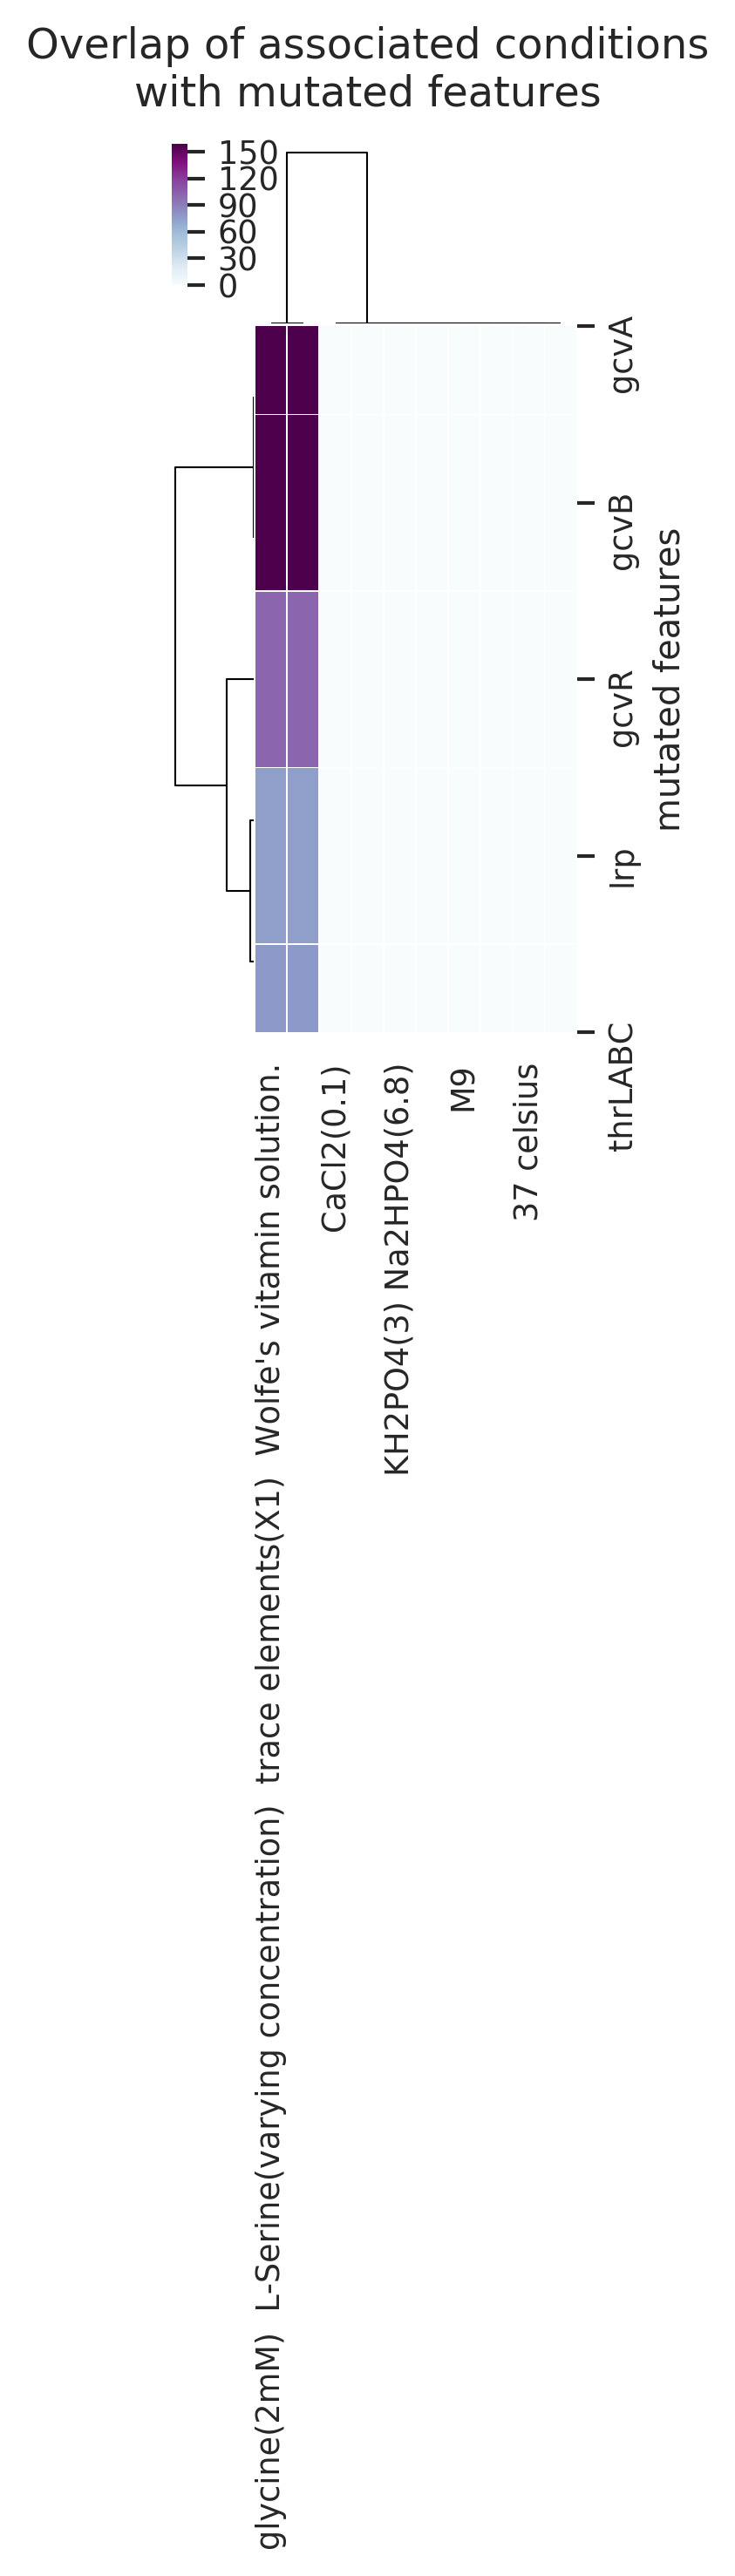

In [32]:
plt.rcParams["figure.dpi"] = 300
sns.set_context("paper")
sns.set_style("whitegrid")

from matplotlib.colors import LinearSegmentedColormap
myColors = ('#FFFFFF', "#4C72B0")
cmap = LinearSegmentedColormap.from_list('Custom', myColors, len(myColors))

g = sns.clustermap(
    odds_df,
    linewidths=0.1,
    cmap="BuPu",
#     cmap=cmap,
#     xticklabels=False,
#     yticklabels=False,
    figsize=(2,4.5)
)
# g.cax.set_visible(False)
# g.cax.legend(loc='center left',bbox_to_anchor=(1.01,0.85),handles=legend_TN,frameon=True)
# g.ax_row_dendrogram.set_visible(False)
# g.ax_col_dendrogram.set_visible(False)
ax = g.ax_heatmap
g.fig.suptitle("Overlap of associated conditions\nwith mutated features") 
# g.ax_heatmap.set_title(
#     "Overlap of associated conditions\nwith mutated features",
# #     loc='top'
# )
# ax.yaxis.set_ticks_position('left')
# ax.yaxis.set_label_position("left")
ax.set_xlabel('')

In [33]:
key_mut_feat_df = cond_mut_feat_assoc_df[
    cond_mut_feat_assoc_df["condition"].isin(cond_cnt_d.keys())
]
key_mut_feat_df = key_mut_feat_df.drop_duplicates()
key_mut_feat_df

,condition,mutated features,odd ratio,p value
0,glycine(2mM) L-Serine(varying concentration) ...,thrLABC,78.105263,0.000013
1,ΔsdaA ΔsdaB ΔtdcG ΔglyA,thrLABC,78.105263,0.000013
3,glycine(2mM) L-Serine(varying concentration) ...,aroP,153.301587,0.007475
4,ΔsdaA ΔsdaB ΔtdcG ΔglyA,aroP,153.301587,0.007475
5,glycine(2mM) L-Serine(varying concentration) ...,gcvR,102.150794,0.000233
6,ΔsdaA ΔsdaB ΔtdcG ΔglyA,gcvR,102.150794,0.000233
7,glycine(2mM) L-Serine(varying concentration) ...,gshA,153.301587,0.007475
8,ΔsdaA ΔsdaB ΔtdcG ΔglyA,gshA,153.301587,0.007475
9,glycine(2mM) L-Serine(varying concentration) ...,gcvB,158.942387,0.000102
10,ΔsdaA ΔsdaB ΔtdcG ΔglyA,gcvB,158.942387,0.000102


In [34]:
# I only want to look at mutated targets that have significant convergence
signif_reg_s = set()
for _, r in muts_df.iterrows():
    for f in r["operons"]:
        if f["significantly enriched"]:
            signif_reg_s.add(f["name"])

key_mut_feat_df = key_mut_feat_df[key_mut_feat_df["mutated features"].isin(signif_reg_s)]
key_mut_feat_df

,condition,mutated features,odd ratio,p value
0,glycine(2mM) L-Serine(varying concentration) ...,thrLABC,78.105263,0.000013
1,ΔsdaA ΔsdaB ΔtdcG ΔglyA,thrLABC,78.105263,0.000013
5,glycine(2mM) L-Serine(varying concentration) ...,gcvR,102.150794,0.000233
6,ΔsdaA ΔsdaB ΔtdcG ΔglyA,gcvR,102.150794,0.000233
9,glycine(2mM) L-Serine(varying concentration) ...,gcvB,158.942387,0.000102
10,ΔsdaA ΔsdaB ΔtdcG ΔglyA,gcvB,158.942387,0.000102
26,glycine(2mM) L-Serine(varying concentration) ...,gcvA,158.942387,0.000102
27,ΔsdaA ΔsdaB ΔtdcG ΔglyA,gcvA,158.942387,0.000102
38,glycine(2mM) L-Serine(varying concentration) ...,lrp,75.249513,0.000416
39,ΔsdaA ΔsdaB ΔtdcG ΔglyA,lrp,75.249513,0.000416


In [35]:
# according to the above, everything associated with Serine is also associated with
# starting strain mutations with the same magnitude, therefore only looking for serine associations.
ser_key_mut_feat_df = key_mut_feat_df[key_mut_feat_df.condition=="glycine(2mM)  L-Serine(varying concentration)  trace elements(X1)  Wolfe's vitamin solution."].copy()
ser_key_mut_feat_df

,condition,mutated features,odd ratio,p value
0,glycine(2mM) L-Serine(varying concentration) ...,thrLABC,78.105263,0.000013
5,glycine(2mM) L-Serine(varying concentration) ...,gcvR,102.150794,0.000233
9,glycine(2mM) L-Serine(varying concentration) ...,gcvB,158.942387,0.000102
26,glycine(2mM) L-Serine(varying concentration) ...,gcvA,158.942387,0.000102
38,glycine(2mM) L-Serine(varying concentration) ...,lrp,75.249513,0.000416


In [36]:
ser_key_mut_feat_df["mutated features"] = ser_key_mut_feat_df["mutated features"].apply(lambda s: s+" operon")
ser_key_mut_feat_df

,condition,mutated features,odd ratio,p value
0,glycine(2mM) L-Serine(varying concentration) ...,thrLABC operon,78.105263,0.000013
5,glycine(2mM) L-Serine(varying concentration) ...,gcvR operon,102.150794,0.000233
9,glycine(2mM) L-Serine(varying concentration) ...,gcvB operon,158.942387,0.000102
26,glycine(2mM) L-Serine(varying concentration) ...,gcvA operon,158.942387,0.000102
38,glycine(2mM) L-Serine(varying concentration) ...,lrp operon,75.249513,0.000416


In [37]:
ser_key_mut_feat_df.to_pickle("./data/ser_operon_assoc_df.pkl")

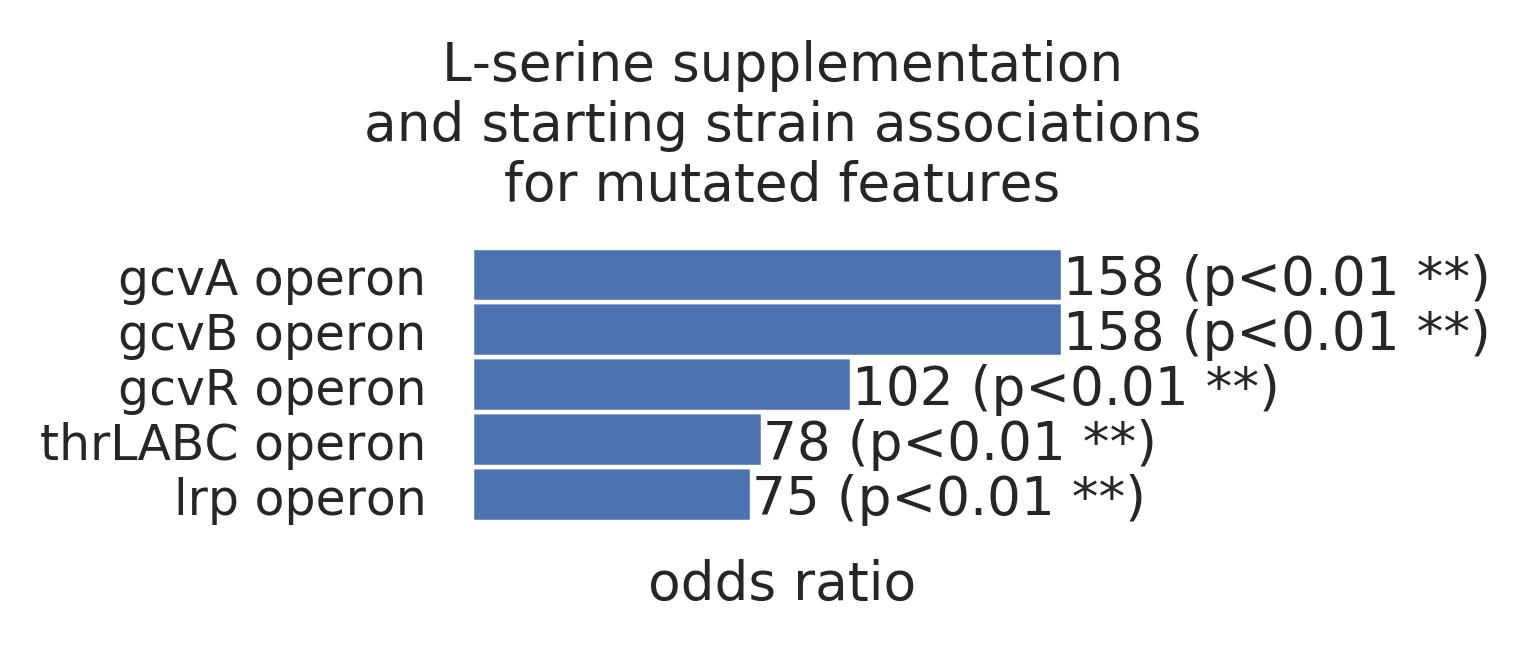

In [38]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.dpi"] = 400
sns.set_context("paper")
sns.set_style("white")


df = ser_key_mut_feat_df.sort_values(by=["odd ratio"], ascending=True)
ax = df.plot.barh(
    y="odd ratio",
    x="mutated features",
    color="#4C72B0",
    figsize=(2,1),
    width=1
)

df = df.reset_index()  # Resetting index for the below annotations to work
for i, r in df.iterrows():
    s = str(int(r["odd ratio"]))
#     ax.text(r["odd ratio"], i-0.3,  s)    
#     s = ""
    if r["p value"] < 0.01:
        s += " (p<0.01 **)"
    else:
        s += " (p=" + '{0:.3f})'.format(r["p value"])
    ax.text(r["odd ratio"], i-0.35,  s)
    
    
sns.despine(ax=ax,
            top=True,
            right=True, 
            bottom=True,
            left=True
           )

ax.set_title("L-serine supplementation\nand starting strain associations\nfor mutated features")
ax.get_legend().remove()
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    labelbottom=False) # labels along the bottom edge are off
ax.set_ylabel('')
ax.set_xlabel("odds ratio")
plt.savefig("fig.svg", format="svg")